In [1]:
import pandas as pd

In [2]:
dataset_1 = pd.read_csv("D:/Projects/Crypto Forecast Models/BNB-USD.csv")
dataset_1.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1.458000e+03
mean,69.329030,72.641543,65.937712,69.606288,69.606288,7.110796e+08
std,134.418804,141.083640,127.435789,134.710070,134.710070,1.501431e+09
min,0.683305,0.740154,0.526755,0.678784,0.678784,9.284000e+03
25%,11.067950,11.415700,10.401825,11.068575,11.068575,6.752167e+07
50%,17.059471,17.467134,16.489868,17.044519,17.044519,2.144618e+08
75%,29.513170,30.341477,28.745466,29.522172,29.522172,4.343310e+08
max,676.315918,690.931946,631.465271,675.684082,675.684082,1.798295e+10


In [3]:
dataset_1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-09-13,1.042900,1.042900,0.880241,0.937204,0.937204,2780700.0
1,2017-09-14,0.937870,0.950177,0.673482,0.678784,0.678784,3134360.0
2,2017-09-15,0.683305,0.849217,0.526755,0.799709,0.799709,4625680.0
3,2017-09-16,0.808056,0.927197,0.746113,0.804198,0.804198,2829570.0
4,2017-09-17,0.803423,0.814797,0.733745,0.789589,0.789589,1273640.0


In [4]:
columns = ['Open','High','Low']
X = dataset_1[columns]
# X.head()
inputshape = X.shape
inputshape

(1462, 3)

In [5]:
y = dataset_1.Close
outputshape = y.shape
check = y.isnull().values.any()
print(check)

True


In [6]:
# from sklearn import *
# !pip install xgboost
from xgboost import XGBRegressor

In [7]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,PowerTransformer

In [22]:
X_train,X_valid,y_train,y_valid = train_test_split(X,y,random_state = 0)

print("\t \t \t \t Overall Notice \n \n \n")

print("\t \t The total number of records in Dataset: ",dataset_1.shape)
print("\t \t -----------------------------------------------------------")
print(f'\t \t The total number of training records for input parameters: {X_train.shape}')
print("\t \t -----------------------------------------------------------")
print(f'\t \t The total number of validation records for input parameters:{X_valid.shape}')
print("\t \t -----------------------------------------------------------")

	 	 	 	 Overall Notice 
 
 

	 	 The total number of records in Dataset:  (1462, 7)
	 	 -----------------------------------------------------------
	 	 The total number of training records for input parameters: (1096, 3)
	 	 -----------------------------------------------------------
	 	 The total number of validation records for input parameters:(366, 3)
	 	 -----------------------------------------------------------


In [23]:
imputer = SimpleImputer(strategy = 'constant')
X_train= imputer.fit_transform(X_train)
# print(X_train.shape[1])
X_valid = imputer.fit_transform(X_valid)
y_train= imputer.fit_transform(np.array(y_train).reshape(-1,1))
y_valid= imputer.fit_transform(np.array(y_valid).reshape(-1,1))

In [24]:

model_1 = XGBRegressor()
my_pipeline1 = Pipeline(steps = [
    ('imputer',imputer),
    ('model1',model_1)
])

In [25]:
my_pipeline1.fit(X_train,y_train)

Pipeline(steps=[('imputer', SimpleImputer(strategy='constant')),
                ('model1',
                 XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=1, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=0, gpu_id=-1,
                              grow_policy='depthwise', importance_type=None,
                              interaction_constraints='',
                              learning_rate=0.300000012, max_bin=256,
                              max_cat_threshold=64, max_cat_to_onehot=4,
                              max_delta_step=0, max_depth=6, max_leaves=0,
                              min_child_weight=1, missing=nan,
                              monotone_constraints='()', n_estimators=100,
                              n_jobs=0, num_parallel_tree=1, predictor='auto',
                              random_state=0, ...))])

In [19]:
X_train = X_train.reshape((X_train.shape[0],1,X_train.shape[1]))
y_train = y_train.reshape((y_train.shape[0],1,y_train.shape[1]))

In [26]:
## Model 2 MultiLayer Perceptron
model_2 = Sequential()
model_2.add(Dense(18,input_shape = [X_train.shape[1]],activation = 'relu'))
model_2.add(Dense(8,activation = 'relu'))
model_2.add(Dense(1,activation = 'linear'))
model_2.compile(loss="mean_absolute_error",optimizer = "adam")


In [27]:
model_2.fit(X_train,y_train,epochs = 50,verbose = 1)
model_2.summary()

Epoch 1/50
35/35 [==============================] - 1s 1ms/step - loss: 11.6741
Epoch 2/50
35/35 [==============================] - 0s 1ms/step - loss: 2.2131
Epoch 3/50
35/35 [==============================] - 0s 1ms/step - loss: 2.0335
Epoch 4/50
35/35 [==============================] - 0s 880us/step - loss: 2.0248
Epoch 5/50
35/35 [==============================] - 0s 2ms/step - loss: 2.1437
Epoch 6/50
35/35 [==============================] - 0s 1ms/step - loss: 2.2060
Epoch 7/50
35/35 [==============================] - 0s 1ms/step - loss: 2.0825
Epoch 8/50
35/35 [==============================] - 0s 1ms/step - loss: 1.9376
Epoch 9/50
35/35 [==============================] - 0s 1ms/step - loss: 1.9879
Epoch 10/50
35/35 [==============================] - 0s 1ms/step - loss: 1.9155
Epoch 11/50
35/35 [==============================] - 0s 849us/step - loss: 1.8506
Epoch 12/50
35/35 [==============================] - 0s 2ms/step - loss: 1.9424
Epoch 13/50
35/35 [=========================

In [28]:
## Model 3 LSTM Layers
def lstm_model(inputshape1,layer_units = [1000,1000],dropouts = [0.2,0.2]):
    model_3 = Sequential()
    model_3.add(LSTM(layer_units[0],input_shape = (inputshape1,1),return_sequences= True))
    model_3.add(Dropout(dropouts[0]))
    
    model_3.add(LSTM(layer_units[1],return_sequences = True))
    model_3.add(Dropout(dropouts[1]))
    
    model_3.add(LSTM(layer_units[1],return_sequences=True))
    model_3.add(Dropout(dropouts[1]))
    
    model_3.add(LSTM(layer_units[1],return_sequences=True))
    model_3.add(Dropout(dropouts[1]))
    
    model_3.add(LSTM(layer_units[1]))
    model_3.add(Dropout(dropouts[1]))
    
    model_3.add(Dense(1,activation = 'linear'))
    model_3.compile(loss = "mse",optimizer = "adam")
    
    return model_3

In [29]:
model_3 = lstm_model(X_train.shape[1])
model_3.fit(X_train,y_train,epochs = 10,verbose = 1)
model_3.summary()

Epoch 1/10
35/35 [==============================] - 23s 438ms/step - loss: 17012.5176
Epoch 2/10
35/35 [==============================] - 15s 436ms/step - loss: 13788.5439
Epoch 3/10
35/35 [==============================] - 15s 430ms/step - loss: 11453.0928
Epoch 4/10
35/35 [==============================] - 15s 440ms/step - loss: 9456.9639
Epoch 5/10
35/35 [==============================] - 16s 448ms/step - loss: 7900.8750
Epoch 6/10
35/35 [==============================] - 15s 434ms/step - loss: 6723.1768
Epoch 7/10
35/35 [==============================] - 15s 419ms/step - loss: 5621.2925
Epoch 8/10
35/35 [==============================] - 19s 558ms/step - loss: 4844.9932
Epoch 9/10
35/35 [==============================] - 19s 543ms/step - loss: 4195.1558
Epoch 10/10
35/35 [==============================] - 18s 504ms/step - loss: 3716.2886
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Par

In [30]:
##Model 4 LSTM Conjugated with CNN
def lstm_cnn_model(inputshape,layer_units = [1000,1000],dropouts = [0.2,0.2]):
    model_4 = Sequential()
    
    model_4.add(Conv1D(2,3,activation = 'relu',padding = 'same',input_shape =(inputshape,1)))
    model_4.add(MaxPool1D(pool_size = (2)))
#     model_4.add(Flatten())
    model_4.add(Conv1D(2,3,activation = 'relu',padding = 'same',input_shape =(inputshape,1)))
    model_4.add(MaxPool1D(pool_size = (1)))
    model_4.add(Conv1D(2,3,activation = 'relu',padding = 'same',input_shape =(inputshape,1)))
    model_4.add(MaxPool1D(pool_size = (1)))
    model_4.add(LSTM(layer_units[0],input_shape = (inputshape,1),return_sequences = True))
    model_4.add(Dropout(dropouts[0]))
    model_4.add(LSTM(layer_units[0],input_shape = (inputshape,1),return_sequences = True))
    model_4.add(Dropout(dropouts[0]))
    model_4.add(LSTM(layer_units[0],input_shape = (inputshape,1),return_sequences = True))
    model_4.add(Dropout(dropouts[0]))
    model_4.add(LSTM(layer_units[1]))
    model_4.add(Dropout(dropouts[1]))
    
    model_4.add(Dense(1,activation = "linear"))
    model_4.compile(loss = "mse",optimizer = "adam")
    
    return model_4

In [31]:
model_4 = lstm_cnn_model(X_train.shape[1])
model_4.fit(X_train,y_train,epochs = 20,verbose = 1)
model_4.summary()

Epoch 1/20
35/35 [==============================] - 15s 182ms/step - loss: 17865.9121
Epoch 2/20
35/35 [==============================] - 6s 181ms/step - loss: 15048.2012
Epoch 3/20
35/35 [==============================] - 6s 170ms/step - loss: 13023.2471
Epoch 4/20
35/35 [==============================] - 6s 183ms/step - loss: 11298.4678
Epoch 5/20
35/35 [==============================] - 7s 189ms/step - loss: 9763.5811
Epoch 6/20
35/35 [==============================] - 6s 172ms/step - loss: 8484.7207
Epoch 7/20
35/35 [==============================] - 6s 169ms/step - loss: 7383.3965
Epoch 8/20
35/35 [==============================] - 6s 158ms/step - loss: 6458.3203
Epoch 9/20
35/35 [==============================] - 6s 169ms/step - loss: 5605.1978
Epoch 10/20
35/35 [==============================] - 6s 161ms/step - loss: 4896.4648
Epoch 11/20
35/35 [==============================] - 5s 156ms/step - loss: 4303.1499
Epoch 12/20
35/35 [==============================] - 6s 164ms/step - 

In [32]:
##Model 5 LSTM conjugated with RNN
def lstm_rnn_model(inputshape,layer_units = [1000,1000],dropouts = [0.2,0.2]):
    model_5 = Sequential()
    model_5.add(Embedding(input_dim = 70000,output_dim = 200))
    model_5.add(GRU(256,return_sequences = True))
    model_5.add(SimpleRNN(64,return_sequences = True))
    model_5.add(GRU(256,return_sequences = True))
    model_5.add(SimpleRNN(64,return_sequences = True))
    model_5.add(LSTM(layer_units[0],input_shape = (inputshape,1),return_sequences = True))
    model_5.add(Dropout(dropouts[0]))
    
    model_5.add(LSTM(layer_units[1]))
    model_5.add(Dropout(dropouts[1]))
    
    model_5.add(Dense(1,activation = "linear"))
    model_5.compile(loss = "mse",optimizer = "adam")
    
    return model_5

In [33]:
model_5 = lstm_rnn_model(X_train.shape[1])
model_5.fit(X_train,y_train,epochs = 20)
model_5.summary()

Epoch 1/20
35/35 [==============================] - 38s 351ms/step - loss: 18330.9941
Epoch 2/20
35/35 [==============================] - 11s 323ms/step - loss: 16154.1055
Epoch 3/20
35/35 [==============================] - 10s 290ms/step - loss: 13346.7383
Epoch 4/20
35/35 [==============================] - 11s 313ms/step - loss: 11515.6641
Epoch 5/20
35/35 [==============================] - 11s 310ms/step - loss: 10163.7900
Epoch 6/20
35/35 [==============================] - 13s 360ms/step - loss: 8960.7852
Epoch 7/20
35/35 [==============================] - 12s 332ms/step - loss: 8223.9795
Epoch 8/20
35/35 [==============================] - 12s 330ms/step - loss: 7722.4390
Epoch 9/20
35/35 [==============================] - 13s 373ms/step - loss: 7400.4321
Epoch 10/20
35/35 [==============================] - 13s 376ms/step - loss: 6270.8091
Epoch 11/20
35/35 [==============================] - 10s 294ms/step - loss: 5873.1099
Epoch 12/20
35/35 [==============================] - 9s 26

In [34]:
def lstm_bidirectional_rnn(inputshape,layer_units = [1000,1000],dropouts = [0.2,0.2]):
    model_6 = Sequential()
    model_6.add(Embedding(input_dim = 100000,output_dim = 300))
    model_6.add(GRU(256,return_sequences = True))
    model_6.add(SimpleRNN(128,return_sequences = True))
    
    model_6.add(Bidirectional(LSTM(layer_units[0],input_shape = (inputshape,1),return_sequences = True)))
    model_6.add(Dropout(dropouts[0]))
    
    model_6.add(Bidirectional(LSTM(layer_units[1])))
    model_6.add(Dropout(dropouts[1]))
    
    model_6.add(Dense(1,activation = "linear"))
    model_6.compile(loss = "mse",optimizer = "adam")
    
    return model_6

In [35]:
model_6 = lstm_bidirectional_rnn(X_train.shape[1])
model_6.fit(X_train,y_train,epochs = 20)
model_6.summary()

Epoch 1/20
35/35 [==============================] - 31s 622ms/step - loss: 16838.7969
Epoch 2/20
35/35 [==============================] - 23s 658ms/step - loss: 10120.5908
Epoch 3/20
35/35 [==============================] - 21s 585ms/step - loss: 6886.5781
Epoch 4/20
35/35 [==============================] - 22s 633ms/step - loss: 5309.5229
Epoch 5/20
35/35 [==============================] - 21s 612ms/step - loss: 3792.8901
Epoch 6/20
35/35 [==============================] - 21s 598ms/step - loss: 3216.4138
Epoch 7/20
35/35 [==============================] - 25s 714ms/step - loss: 2985.8730
Epoch 8/20
35/35 [==============================] - 28s 816ms/step - loss: 2830.2056
Epoch 9/20
35/35 [==============================] - 28s 790ms/step - loss: 2760.4287
Epoch 10/20
35/35 [==============================] - 27s 755ms/step - loss: 2734.6877
Epoch 11/20
21/35 [=================>............] - ETA: 11s - loss: 2648.9534

ResourceExhaustedError: Graph execution error:

Detected at node 'Adam/Adam/update/AssignVariableOp' defined at (most recent call last):
    File "C:\Users\raghu\anaconda3\lib\runpy.py", line 197, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "C:\Users\raghu\anaconda3\lib\runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "C:\Users\raghu\AppData\Roaming\Python\Python39\site-packages\ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "C:\Users\raghu\AppData\Roaming\Python\Python39\site-packages\traitlets\config\application.py", line 845, in launch_instance
      app.start()
    File "C:\Users\raghu\AppData\Roaming\Python\Python39\site-packages\ipykernel\kernelapp.py", line 612, in start
      self.io_loop.start()
    File "C:\Users\raghu\AppData\Roaming\Python\Python39\site-packages\tornado\platform\asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "C:\Users\raghu\anaconda3\lib\asyncio\windows_events.py", line 316, in run_forever
      super().run_forever()
    File "C:\Users\raghu\anaconda3\lib\asyncio\base_events.py", line 596, in run_forever
      self._run_once()
    File "C:\Users\raghu\anaconda3\lib\asyncio\base_events.py", line 1890, in _run_once
      handle._run()
    File "C:\Users\raghu\anaconda3\lib\asyncio\events.py", line 80, in _run
      self._context.run(self._callback, *self._args)
    File "C:\Users\raghu\AppData\Roaming\Python\Python39\site-packages\tornado\ioloop.py", line 688, in <lambda>
      lambda f: self._run_callback(functools.partial(callback, future))
    File "C:\Users\raghu\AppData\Roaming\Python\Python39\site-packages\tornado\ioloop.py", line 741, in _run_callback
      ret = callback()
    File "C:\Users\raghu\AppData\Roaming\Python\Python39\site-packages\tornado\gen.py", line 814, in inner
      self.ctx_run(self.run)
    File "C:\Users\raghu\AppData\Roaming\Python\Python39\site-packages\tornado\gen.py", line 775, in run
      yielded = self.gen.send(value)
    File "C:\Users\raghu\AppData\Roaming\Python\Python39\site-packages\ipykernel\kernelbase.py", line 374, in dispatch_queue
      yield self.process_one()
    File "C:\Users\raghu\AppData\Roaming\Python\Python39\site-packages\tornado\gen.py", line 250, in wrapper
      runner = Runner(ctx_run, result, future, yielded)
    File "C:\Users\raghu\AppData\Roaming\Python\Python39\site-packages\tornado\gen.py", line 741, in __init__
      self.ctx_run(self.run)
    File "C:\Users\raghu\AppData\Roaming\Python\Python39\site-packages\tornado\gen.py", line 775, in run
      yielded = self.gen.send(value)
    File "C:\Users\raghu\AppData\Roaming\Python\Python39\site-packages\ipykernel\kernelbase.py", line 358, in process_one
      yield gen.maybe_future(dispatch(*args))
    File "C:\Users\raghu\AppData\Roaming\Python\Python39\site-packages\tornado\gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "C:\Users\raghu\AppData\Roaming\Python\Python39\site-packages\ipykernel\kernelbase.py", line 261, in dispatch_shell
      yield gen.maybe_future(handler(stream, idents, msg))
    File "C:\Users\raghu\AppData\Roaming\Python\Python39\site-packages\tornado\gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "C:\Users\raghu\AppData\Roaming\Python\Python39\site-packages\ipykernel\kernelbase.py", line 536, in execute_request
      self.do_execute(
    File "C:\Users\raghu\AppData\Roaming\Python\Python39\site-packages\tornado\gen.py", line 234, in wrapper
      yielded = ctx_run(next, result)
    File "C:\Users\raghu\AppData\Roaming\Python\Python39\site-packages\ipykernel\ipkernel.py", line 302, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "C:\Users\raghu\AppData\Roaming\Python\Python39\site-packages\ipykernel\zmqshell.py", line 539, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "C:\Users\raghu\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py", line 2898, in run_cell
      result = self._run_cell(
    File "C:\Users\raghu\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py", line 2944, in _run_cell
      return runner(coro)
    File "C:\Users\raghu\AppData\Roaming\Python\Python39\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "C:\Users\raghu\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py", line 3169, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "C:\Users\raghu\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py", line 3361, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "C:\Users\raghu\AppData\Roaming\Python\Python39\site-packages\IPython\core\interactiveshell.py", line 3441, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "<ipython-input-35-db2b0fb9d512>", line 2, in <module>
      model_6.fit(X_train,y_train,epochs = 20)
    File "C:\Users\raghu\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 64, in error_handler
      return fn(*args, **kwargs)
    File "C:\Users\raghu\anaconda3\lib\site-packages\keras\engine\training.py", line 1384, in fit
      tmp_logs = self.train_function(iterator)
    File "C:\Users\raghu\anaconda3\lib\site-packages\keras\engine\training.py", line 1021, in train_function
      return step_function(self, iterator)
    File "C:\Users\raghu\anaconda3\lib\site-packages\keras\engine\training.py", line 1010, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\raghu\anaconda3\lib\site-packages\keras\engine\training.py", line 1000, in run_step
      outputs = model.train_step(data)
    File "C:\Users\raghu\anaconda3\lib\site-packages\keras\engine\training.py", line 863, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "C:\Users\raghu\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py", line 532, in minimize
      return self.apply_gradients(grads_and_vars, name=name)
    File "C:\Users\raghu\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py", line 671, in apply_gradients
      return tf.__internal__.distribute.interim.maybe_merge_call(
    File "C:\Users\raghu\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py", line 716, in _distributed_apply
      update_op = distribution.extended.update(
    File "C:\Users\raghu\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py", line 694, in apply_grad_to_update_var
      return self._resource_apply_sparse_duplicate_indices(
    File "C:\Users\raghu\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py", line 1280, in _resource_apply_sparse_duplicate_indices
      return self._resource_apply_sparse(summed_grad, handle, unique_indices,
    File "C:\Users\raghu\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py", line 201, in _resource_apply_sparse
      m_t = tf.compat.v1.assign(m, m * coefficients['beta_1_t'],
Node: 'Adam/Adam/update/AssignVariableOp'
OOM when allocating tensor with shape[100000,300] and type float on /job:localhost/replica:0/task:0/device:CPU:0 by allocator cpu
	 [[{{node Adam/Adam/update/AssignVariableOp}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_61610]

In [ ]:
def adcnn_model(inputshape,layer_units = [100,100],dropouts = [0.5,0.5]):
    model_7 = Sequential()
    
    model_7.add(Conv1D(64,32,activation = 'relu',padding = 'same',input_shape = (inputshape,1)))
    model_7.add(MaxPool1D(pool_size = (1)))
    model_7.add(Dense(1))
    model_7.add(Conv1D(32,16,activation = 'relu',padding = 'same'))
    model_7.add(MaxPool1D(pool_size = (1)))
    model_7.add(Dense(1))
    
    
    model_7.add(LSTM(layer_units[0],input_shape = (inputshape,1),return_sequences=True))
    model_7.add(Dropout(dropouts[0]))
    
    model_7.add(LSTM(layer_units[1]))
    model_7.add(Dropout(dropouts[1]))
#     model_7.add(Flatten())
    model_7.add(Dense(1,activation = "linear"))
    model_7.compile(loss = 'mse',optimizer = "adam")
    return model_7

In [ ]:
def time_cnn_lstm(inputshape,layer_units = [1000,1000],dropouts = [0.2,0.2]):
    model_8 = Sequential()
    
    model_8.add(Conv1D(2,3,padding = 'same',input_shape = (inputshape,1)))
    model_8.add(LeakyReLU())
    model_8.add(MaxPool1D(pool_size = (2)))
    
    model_8.add(Conv1D(2,3,padding = 'same'))
    model_8.add(LeakyReLU())
    model_8.add(MaxPool1D(pool_size = (1)))
    
    model_8.add(Conv1D(2,3,padding = 'same'))
    model_8.add(LeakyReLU())
    model_8.add(MaxPool1D(pool_size = (1)))
    
        
    model_8.add(Conv1D(2,3,padding = 'same'))
    model_8.add(LeakyReLU())
    model_8.add(MaxPool1D(pool_size = (1)))
    
    model_8.add(Conv1D(2,3,padding = 'same'))
    model_8.add(LeakyReLU())
    model_8.add(MaxPool1D(pool_size = (1)))
    
#     model_8.add(Flatten())
    
    model_8.add(LSTM(layer_units[0],input_shape = (inputshape,1),return_sequences = True))
    model_8.add(Dropout(dropouts[0]))
    
    model_8.add(LSTM(layer_units[1]))
    model_8.add(Dropout(dropouts[1]))
    
    model_8.add(Dense(1,activation = 'linear'))
    model_8.compile(loss = 'mse',optimizer = "adam")
    return model_8

In [ ]:
model_8 = time_cnn_lstm(X_train.shape[1])
model_8.fit(X_train,y_train,epochs = 20)
model_8.summary()

In [ ]:

def sepconvmodel(inputshape,layer_units = [1000,1000],dropouts = [0.2,0.2]):
    model_9 = Sequential()
    
    model_9.add(SeparableConv1D(2,3,padding = 'same',input_shape = (inputshape,1)))
    model_9.add(LeakyReLU())
    model_9.add(MaxPool1D(pool_size=2))
    
    model_9.add(SeparableConv1D(2,3,padding = 'same'))
    model_9.add(LeakyReLU())
    model_9.add(MaxPool1D(pool_size = (1)))
    
    model_9.add(SeparableConv1D(2,3,padding = 'same'))
    model_9.add(LeakyReLU())
    model_9.add(MaxPool1D(pool_size = (1)))
    
    model_9.add(SeparableConv1D(2,3,padding = 'same'))
    model_9.add(LeakyReLU())
    model_9.add(MaxPool1D(pool_size = (1)))
#     model_9.add(Flatten())
    
    model_9.add(LSTM(layer_units[0],input_shape = (inputshape,1),return_sequences = True))
    model_9.add(Dropout(dropouts[0]))
    
    model_9.add(LSTM(layer_units[1]))
    model_9.add(Dropout(dropouts[1]))
    
    model_9.add(Dense(1,activation = 'linear'))
    model_9.compile(loss = 'mse',optimizer = 'adam')
    return model_9

In [ ]:
model_9 = sepconvmodel(X_train.shape[1])
model_9.fit(X_train,y_train,epochs = 20)
model_9.summary()

In [ ]:

def gaussianmodel(inputshape,layer_units = [100,100],dropout = [0.2,0.2]):
    model_10 = Sequential()
    
    model_10.add(Conv1D(2,3,padding = 'same',input_shape = (inputshape,1)))
#     model_10.add(Conv1D(2,3,padding = 'same'))
#     model_10.add(GaussianNoise(stddev = 6))
#     model_10.add(LeakyReLU())
    model_10.add(MaxPool1D(pool_size = (25)))
    
    model_10.add(Conv1D(2,3,padding = 'same'))
#     model_10.add(Conv1D(2,3,padding = 'same'))
#     model_10.add(GaussianNoise(stddev = 6))
#     model_10.add(LeakyReLU())
    model_10.add(MaxPool1D(pool_size = (25)))
    
#     model_10.add(Flatten())
    
    model_10.add(Dense(LSTM(layer_units[0],input_shape = (inputshape,1),return_sequences = True)))
    model_10.add(Dropout(dropout[0]))
    
    model_10.add(Dense(LSTM(layer_units[1])))
    model_10.add(Dropout(dropout[1]))
    
#     model_10.add(Dense())
    model_10.add(Dense(1,activation = 'linear'))
    model_10.compile(optimizer = 'adam')
    return model_10

In [ ]:
model_7 = adcnn_model(X_train.shape[1])
print(X_train.shape[1])
model_7.fit(X_train,y_train,epochs = 100)
model_7.summary()

In [ ]:
print(X_train.shape[0])


In [ ]:
model_10 = gaussianmodel(X_train.shape[1])
model_10.fit(X_train,y_train,epochs = 10)
model_10.summary()

In [36]:
predictions_1= my_pipeline1.predict(X_valid)

In [37]:
predictions_2 = model_2.predict(X_valid)
predictions_2 = predictions_2.ravel()

In [38]:
predictions_3 = model_3.predict(X_valid)
predictions_3 = predictions_3.ravel()

In [39]:
predictions_4 = model_4.predict(X_valid)
predictions_4 = predictions_4.ravel()

In [40]:
predictions_5 = model_5.predict(X_valid)
predictions_5 = predictions_5.ravel()

In [41]:
predictions_6 = model_6.predict(X_valid)
predictions_6 = predictions_6.ravel()

In [42]:
predictions_7 = model_7.predict(X_valid)
predictions_7 = predictions_7.ravel()

NameError: name 'model_7' is not defined

In [43]:
predictions_8 = model_8.predict(X_valid)
predictions_8 = predictions_8.ravel()

NameError: name 'model_8' is not defined

In [44]:
predictions_9 = model_9.predict(X_valid)
predictions_9 = predictions_9.ravel()

NameError: name 'model_9' is not defined

In [45]:
predictions_10 = model_10.predict(X_valid)
predictions_10 = predictions_10.ravel()

NameError: name 'model_10' is not defined

In [46]:
import matplotlib.pyplot as plt

In [47]:
columns = X.columns
print("Correlation Score --: \n")
for i in columns:
    print(f'{i} correlation Score --: {X[i].corr(y)}')

Correlation Score --: 

Open correlation Score --: 0.9963492948905941
High correlation Score --: 0.9984081252838538
Low correlation Score --: 0.9982550684150127


In [48]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,mean_absolute_percentage_error,r2_score
from tensorflow.keras.metrics import MeanRelativeError, RootMeanSquaredError

In [49]:
## XGBoost Regressor
print("\t \t \t XGBoost Regressor Evaluation Metrics \n \n")
print(f' \t \t Mean Absolute Error (MAE) --: {mean_absolute_error(y_valid,predictions_1)}')
print(f'\t \t Mean Squared Error (MSE) --: {mean_squared_error(y_valid,predictions_1)}')
print(f'\t \t Mean absolute percentage error (MAPE) --: {mean_absolute_percentage_error(y_valid,predictions_1)}')

m1_svm = MeanRelativeError(normalizer = y_valid)
m1_svm.update_state(y_valid,predictions_1)
print(f'\t \t Mean Relative Error (MRE) --: {m1_svm.result().numpy()}')

m2_svm = RootMeanSquaredError()
m2_svm.update_state(y_valid,predictions_1)
print(f'\t \t Root Mean Squared Error (RMSE) --: {m2_svm.result().numpy()}')

print(f'\t \t R2 Score --: {r2_score(y_valid,predictions_1)}')

	 	 	 XGBoost Regressor Evaluation Metrics 
 

 	 	 Mean Absolute Error (MAE) --: 2.796202746457603
	 	 Mean Squared Error (MSE) --: 79.02776302825141
	 	 Mean absolute percentage error (MAPE) --: 2137691437940.138
	 	 Mean Relative Error (MRE) --: 0.029020562767982483
	 	 Root Mean Squared Error (RMSE) --: 8.889756202697754
	 	 R2 Score --: 0.996348542761855


In [50]:
## MLP Regressor
print("\t \t \t MLP Regressor Evaluation Metrics \n \n")
print(f' \t \t Mean Absolute Error (MAE) --: {mean_absolute_error(y_valid,predictions_2)}')
print(f'\t \t Mean Squared Error (MSE) --: {mean_squared_error(y_valid,predictions_2)}')
print(f'\t \t Mean absolute percentage error (MAPE) --: {mean_absolute_percentage_error(y_valid,predictions_2)}')

m1_ada = MeanRelativeError(normalizer = y_valid)
m1_ada.update_state(y_valid,predictions_2)
print(f'\t \t Mean Relative Error (MRE) --: {m1_ada.result().numpy()}')

m2_ada = RootMeanSquaredError()
m2_ada.update_state(y_valid,predictions_2)
print(f'\t \t Root Mean Squared Error (RMSE) --: {m2_ada.result().numpy()}')

print(f'\t \t R2 Score --: {r2_score(y_valid,predictions_2)}')

	 	 	 MLP Regressor Evaluation Metrics 
 

 	 	 Mean Absolute Error (MAE) --: 1.543533697281058
	 	 Mean Squared Error (MSE) --: 24.970913581352452
	 	 Mean absolute percentage error (MAPE) --: 640292363974.6647
	 	 Mean Relative Error (MRE) --: 0.019734466448426247
	 	 Root Mean Squared Error (RMSE) --: 4.997090816497803
	 	 R2 Score --: 0.9988462254321038


In [51]:
## LSTM Machines
print("\t \t \t LSTM Evaluation Metrics \n \n")
print(f' \t \t Mean Absolute Error (MAE) --: {mean_absolute_error(y_valid,predictions_3)}')
print(f'\t \t Mean Squared Error (MSE) --: {mean_squared_error(y_valid,predictions_3)}')
print(f'\t \t Mean absolute percentage error (MAPE) --: {mean_absolute_percentage_error(y_valid,predictions_3)}')

m1_elm = MeanRelativeError(normalizer = y_valid)
m1_elm.update_state(y_valid,predictions_3)
print(f'\t \t Mean Relative Error (MRE) --: {m1_elm.result().numpy()}')

m2_elm = RootMeanSquaredError()
m2_elm.update_state(y_valid,predictions_3)
print(f'\t \t Root Mean Squared Error (RMSE) --: {m2_elm.result().numpy()}')

print(f'\t \t R2 Score --: {r2_score(y_valid,predictions_3)}')

	 	 	 LSTM Evaluation Metrics 
 

 	 	 Mean Absolute Error (MAE) --: 32.093015863471194
	 	 Mean Squared Error (MSE) --: 4920.357937249882
	 	 Mean absolute percentage error (MAPE) --: 62906097682264.875
	 	 Mean Relative Error (MRE) --: 0.73603355884552
	 	 Root Mean Squared Error (RMSE) --: 70.145263671875
	 	 R2 Score --: 0.7726561411359641


In [52]:
## LSTM with CNN Machines
print("\t \t \t LSTM with CNN Evaluation Metrics \n \n")
print(f' \t \t Mean Absolute Error (MAE) --: {mean_absolute_error(y_valid,predictions_4)}')
print(f'\t \t Mean Squared Error (MSE) --: {mean_squared_error(y_valid,predictions_4)}')
print(f'\t \t Mean absolute percentage error (MAPE) --: {mean_absolute_percentage_error(y_valid,predictions_4)}')

m1_elm = MeanRelativeError(normalizer = y_valid)
m1_elm.update_state(y_valid,predictions_4)
print(f'\t \t Mean Relative Error (MRE) --: {m1_elm.result().numpy()}')

m2_elm = RootMeanSquaredError()
m2_elm.update_state(y_valid,predictions_4)
print(f'\t \t Root Mean Squared Error (RMSE) --: {m2_elm.result().numpy()}')

print(f'\t \t R2 Score --: {r2_score(y_valid,predictions_4)}')

	 	 	 LSTM with CNN Evaluation Metrics 
 

 	 	 Mean Absolute Error (MAE) --: 14.440217934890997
	 	 Mean Squared Error (MSE) --: 2653.7378021092063
	 	 Mean absolute percentage error (MAPE) --: 22604845602670.613
	 	 Mean Relative Error (MRE) --: 0.09894675016403198
	 	 Root Mean Squared Error (RMSE) --: 51.514442443847656
	 	 R2 Score --: 0.8773847350052588


In [53]:
## LSTM with RNN Machines
print("\t \t \t LSTM with RNN Evaluation Metrics \n \n")
print(f' \t \t Mean Absolute Error (MAE) --: {mean_absolute_error(y_valid,predictions_5)}')
print(f'\t \t Mean Squared Error (MSE) --: {mean_squared_error(y_valid,predictions_5)}')
print(f'\t \t Mean absolute percentage error (MAPE) --: {mean_absolute_percentage_error(y_valid,predictions_5)}')

m1_elm = MeanRelativeError(normalizer = y_valid)
m1_elm.update_state(y_valid,predictions_5)
print(f'\t \t Mean Relative Error (MRE) --: {m1_elm.result().numpy()}')

m2_elm = RootMeanSquaredError()
m2_elm.update_state(y_valid,predictions_5)
print(f'\t \t Root Mean Squared Error (RMSE) --: {m2_elm.result().numpy()}')

print(f'\t \t R2 Score --: {r2_score(y_valid,predictions_5)}')

	 	 	 LSTM with RNN Evaluation Metrics 
 

 	 	 Mean Absolute Error (MAE) --: 52.28821575521275
	 	 Mean Squared Error (MSE) --: 16861.36527649863
	 	 Mean absolute percentage error (MAPE) --: 61376467376072.83
	 	 Mean Relative Error (MRE) --: 0.7920822501182556
	 	 Root Mean Squared Error (RMSE) --: 129.851318359375
	 	 R2 Score --: 0.22092500249731684


In [54]:
## LSTM with RNN Machines
print("\t \t \t LSTM with Bi-directional RNN Evaluation Metrics \n \n")
print(f' \t \t Mean Absolute Error (MAE) --: {mean_absolute_error(y_valid,predictions_6)}')
print(f'\t \t Mean Squared Error (MSE) --: {mean_squared_error(y_valid,predictions_6)}')
print(f'\t \t Mean absolute percentage error (MAPE) --: {mean_absolute_percentage_error(y_valid,predictions_6)}')

m1_elm = MeanRelativeError(normalizer = y_valid)
m1_elm.update_state(y_valid,predictions_6)
print(f'\t \t Mean Relative Error (MRE) --: {m1_elm.result().numpy()}')

m2_elm = RootMeanSquaredError()
m2_elm.update_state(y_valid,predictions_6)
print(f'\t \t Root Mean Squared Error (RMSE) --: {m2_elm.result().numpy()}')

print(f'\t \t R2 Score --: {r2_score(y_valid,predictions_6)}')

	 	 	 LSTM with Bi-directional RNN Evaluation Metrics 
 

 	 	 Mean Absolute Error (MAE) --: 31.61314182263967
	 	 Mean Squared Error (MSE) --: 7148.306382758046
	 	 Mean absolute percentage error (MAPE) --: 154574112750542.4
	 	 Mean Relative Error (MRE) --: 0.7794016003608704
	 	 Root Mean Squared Error (RMSE) --: 84.54765319824219
	 	 R2 Score --: 0.6697143626288788


In [55]:
## LSTM with RNN Machines
print("\t \t \t AdCNN Evaluation Metrics \n \n")
print(f' \t \t Mean Absolute Error (MAE) --: {mean_absolute_error(y_valid,predictions_7)}')
print(f'\t \t Mean Squared Error (MSE) --: {mean_squared_error(y_valid,predictions_7)}')
print(f'\t \t Mean absolute percentage error (MAPE) --: {mean_absolute_percentage_error(y_valid,predictions_7)}')

m1_elm = MeanRelativeError(normalizer = y_valid)
m1_elm.update_state(y_valid,predictions_7)
print(f'\t \t Mean Relative Error (MRE) --: {m1_elm.result().numpy()}')

m2_elm = RootMeanSquaredError()
m2_elm.update_state(y_valid,predictions_7)
print(f'\t \t Root Mean Squared Error (RMSE) --: {m2_elm.result().numpy()}')

print(f'\t \t R2 Score --: {r2_score(y_valid,predictions_7)}')

	 	 	 AdCNN Evaluation Metrics 
 



NameError: name 'predictions_7' is not defined

In [57]:
## LSTM with RNN Machines
print("\t \t \t Time CNN LSTM Evaluation Metrics \n \n")
print(f' \t \t Mean Absolute Error (MAE) --: {mean_absolute_error(y_valid,predictions_8)}')
print(f'\t \t Mean Squared Error (MSE) --: {mean_squared_error(y_valid,predictions_8)}')
print(f'\t \t Mean absolute percentage error (MAPE) --: {mean_absolute_percentage_error(y_valid,predictions_8)}')

m1_elm = MeanRelativeError(normalizer = y_valid)
m1_elm.update_state(y_valid,predictions_8)
print(f'\t \t Mean Relative Error (MRE) --: {m1_elm.result().numpy()}')


m2_elm = RootMeanSquaredError()
m2_elm.update_state(y_valid,predictions_8)
print(f'\t \t Root Mean Squared Error (RMSE) --: {m2_elm.result().numpy()}')

print(f'\t \t R2 Score --: {r2_score(y_valid,predictions_8)}')

	 	 	 Time CNN LSTM Evaluation Metrics 
 



NameError: name 'predictions_8' is not defined

In [58]:
## LSTM with RNN Machines
print("\t \t \t Separable Conv Evaluation Metrics \n \n")
print(f' \t \t Mean Absolute Error (MAE) --: {mean_absolute_error(y_valid,predictions_9)}')
print(f'\t \t Mean Squared Error (MSE) --: {mean_squared_error(y_valid,predictions_9)}')
print(f'\t \t Mean absolute percentage error (MAPE) --: {mean_absolute_percentage_error(y_valid,predictions_9)}')

m1_elm = MeanRelativeError(normalizer = y_valid)
m1_elm.update_state(y_valid,predictions_9)
print(f'\t \t Mean Relative Error (MRE) --: {m1_elm.result().numpy()}')

m2_elm = RootMeanSquaredError()
m2_elm.update_state(y_valid,predictions_9)
print(f'\t \t Root Mean Squared Error (RMSE) --: {m2_elm.result().numpy()}')

print(f'\t \t R2 Score --: {r2_score(y_valid,predictions_9)}')

	 	 	 Separable Conv Evaluation Metrics 
 



NameError: name 'predictions_9' is not defined

In [59]:
## LSTM with RNN Machines
print("\t \t \t Gaussian Model Evaluation Metrics \n \n")
print(f' \t \t Mean Absolute Error (MAE) --: {mean_absolute_error(y_valid,predictions_10)}')
print(f'\t \t Mean Squared Error (MSE) --: {mean_squared_error(y_valid,predictions_10)}')
print(f'\t \t Mean absolute percentage error (MAPE) --: {mean_absolute_percentage_error(y_valid,predictions_10)}')

m1_elm = MeanRelativeError(normalizer = y_valid)
m1_elm.update_state(y_valid,predictions_10)
print(f'\t \t Mean Relative Error (MRE) --: {m1_elm.result().numpy()}')

m2_elm = RootMeanSquaredError()
m2_elm.update_state(y_valid,predictions_10)
print(f'\t \t Root Mean Squared Error (RMSE) --: {m2_elm.result().numpy()}')

print(f'\t \t R2 Score --: {r2_score(y_valid,predictions_10)}')

	 	 	 Gaussian Model Evaluation Metrics 
 



NameError: name 'predictions_10' is not defined

In [60]:
import matplotlib.pyplot as plt

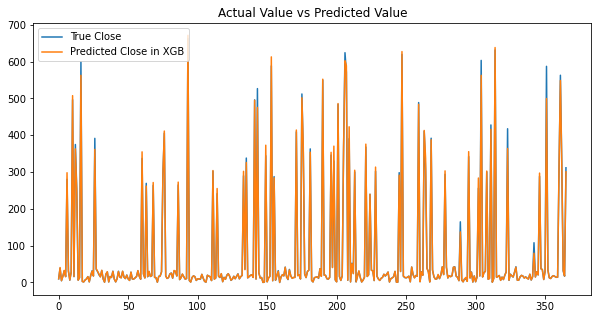

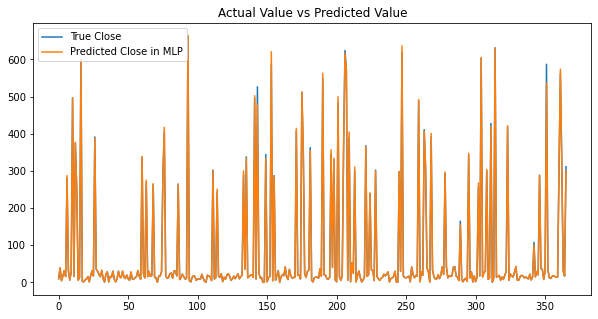

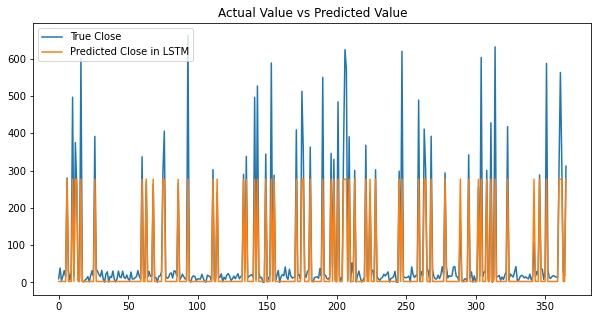

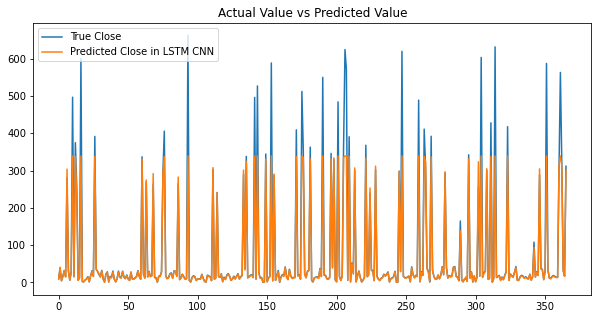

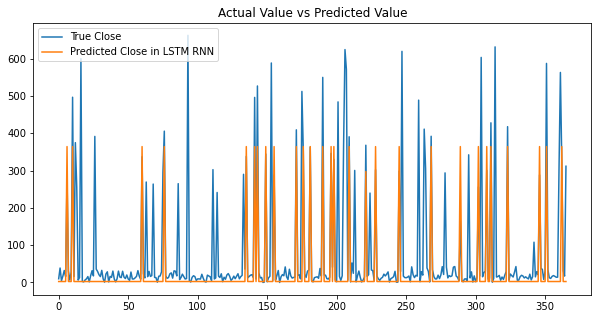

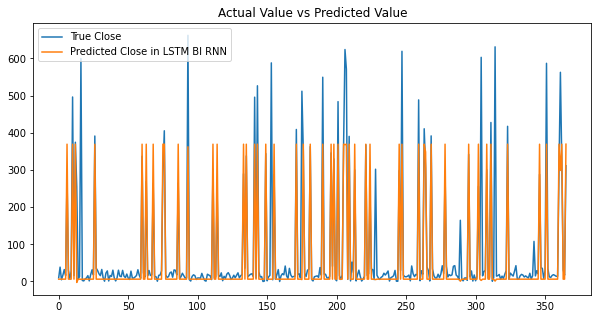

NameError: name 'predictions_8' is not defined

In [61]:
# 1. Actual value vs predicted value
def plot_reg_results(data,predicted_data, true_data):
    fig = plt.figure(facecolor='white', figsize=(10, 5))
    ax = fig.add_subplot(111)
    
    # plot actual data
    ax.plot(true_data, 
            label='True Close')
    
    # plot flattened data
    ax.plot(predicted_data, 
             label=f'Predicted Close in {data}')
    
    plt.legend(loc = 'upper left')
    plt.title("Actual Value vs Predicted Value")
    plt.show()

plot_reg_results("XGB",predictions_1,y_valid)
# plot_results("XGB",predictions_1,y_valid)
plot_reg_results("MLP",predictions_2,y_valid)
# plot_results("MLP",predictions_2,y_valid)
plot_reg_results("LSTM",predictions_3,y_valid)
plot_reg_results("LSTM CNN",predictions_4,y_valid)
plot_reg_results("LSTM RNN",predictions_5,y_valid)
plot_reg_results("LSTM BI RNN",predictions_6,y_valid)
# plot_reg_results("ADCNN",predictions_7,y_valid)
plot_reg_results("TIME CNN LSTM",predictions_8,y_valid)
plot_reg_results("SEP CONV",predictions_9,y_valid)
# plot_reg_results("GAUSSIAN",predictions_10[0:9],y_valid[0:9])

No handles with labels found to put in legend.


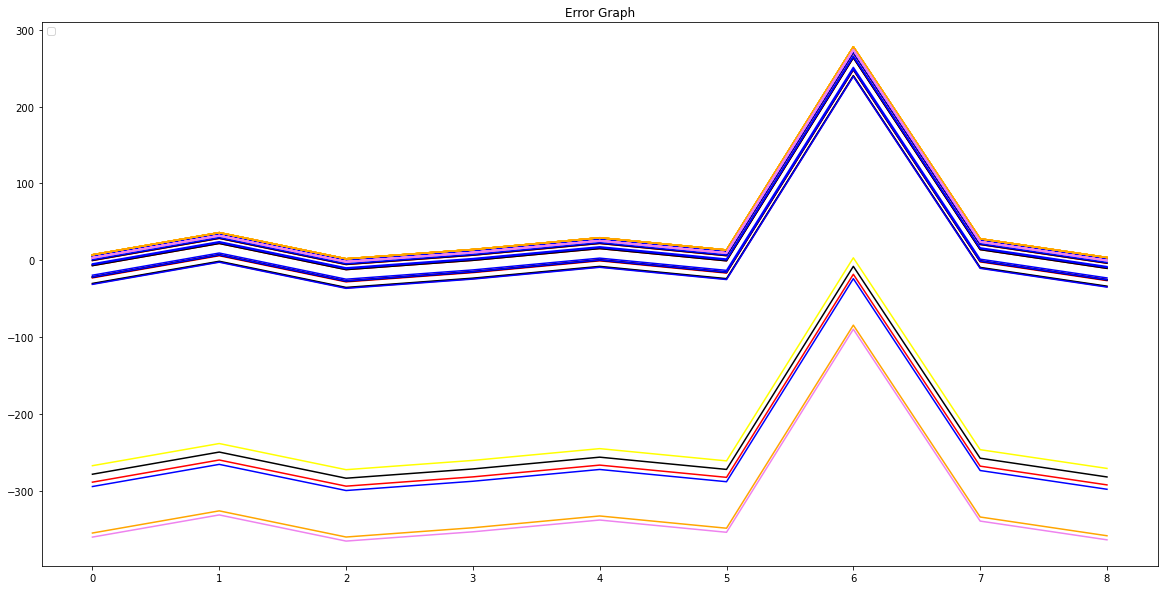

In [99]:
# 1. Actual value vs predicted value
def error_variation_graph(error_1,error_2,error_3,error_4,error_5,error_6):
    fig = plt.figure(facecolor='white', figsize=(20, 10))
    ax = fig.add_subplot(111)
    
    # plot actual data
    ax.plot(error_1, 
            label='Error in XGBoost',
            c='red')
    
    # plot flattened data
    ax.plot(error_2, 
             label='Error in MLP',
             c='black')
    
    ax.plot(error_3, 
             label='Error in LSTM',
             c='yellow')
    
    ax.plot(error_4, 
             label='Error in LSTM with CNN',
             c='blue')
    
    ax.plot(error_5, 
             label='Error in LSTM with RNN',
             c='orange')
    
    ax.plot(error_6, 
             label='Error in LSTM with Bi-directional RNN',
             c='violet')
    
    plt.legend(loc = 'upper left')
    plt.title("Error Graph")
    plt.show()

error_variation_graph(y_valid-predictions_1,y_valid-predictions_2,y_valid-predictions_3,y_valid-predictions_4,y_valid-predictions_5,y_valid-predictions_6)

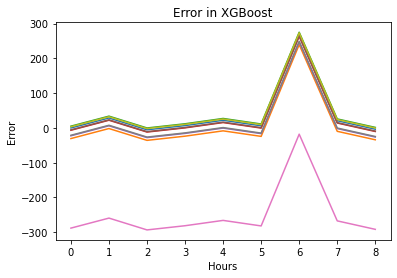

In [85]:
# 2. Error Variation Graph
def error_variation_graph(text,data):
    fig,ax = plt.subplots()
    ax = plt.plot(data)
    plt.title(f'Error in {text}')
    plt.xlabel("Hours")
    plt.ylabel("Error")
    plt.show()
error_variation_graph("XGBoost",y_valid[0:9]-predictions_1[0:9])

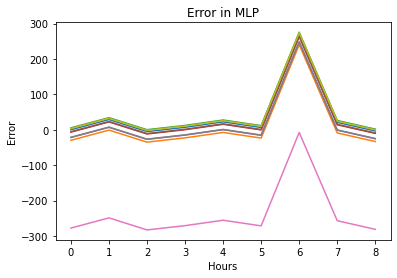

In [84]:
error_variation_graph("MLP",y_valid[0:9]-predictions_2[0:9])

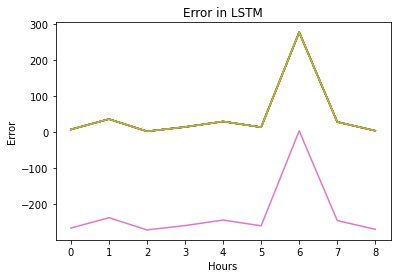

In [92]:
error_variation_graph("LSTM",y_valid[0:9]-predictions_3[0:9])

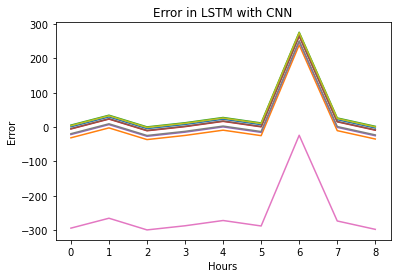

In [97]:
error_variation_graph("LSTM with CNN",y_valid[0:9]-predictions_4[0:9])

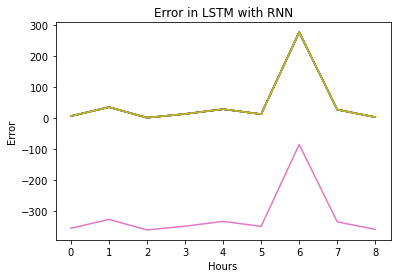

In [78]:
error_variation_graph("LSTM with RNN",y_valid[0:9]-predictions_5[0:9],dataset_1.index[0:9])

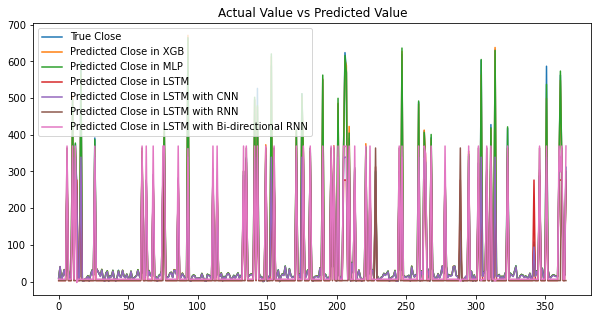

In [101]:
def plot_parity(predicted_data1,predicted_data2,predicted_data3,predicted_data4,predicted_data5,predicted_data6,true_data):
    fig = plt.figure(facecolor='white', figsize=(10, 5))
    ax = fig.add_subplot(111)
    
    # plot actual data
    ax.plot(true_data, 
            label='True Close')
    
    # plot flattened data
    ax.plot(predicted_data1, 
             label='Predicted Close in XGB')
    
    ax.plot(predicted_data2, 
             label='Predicted Close in MLP')
    ax.plot(predicted_data3, 
             label='Predicted Close in LSTM')
    ax.plot(predicted_data4, 
             label='Predicted Close in LSTM with CNN')
    ax.plot(predicted_data5, 
             label='Predicted Close in LSTM with RNN')
    ax.plot(predicted_data6, 
             label='Predicted Close in LSTM with Bi-directional RNN')
    
    plt.legend(loc = 'upper left')
    plt.title("Actual Value vs Predicted Value")
    plt.show()
plot_parity(predictions_1,predictions_2,predictions_3,predictions_4,predictions_5,predictions_6,y_valid)